In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("seaborn:", sns.__version__)


numpy: 1.26.4
pandas: 1.5.3
seaborn: 0.13.2


In [41]:
df = pd.read_csv("../data/raw/Telco-Customer-Churn.csv")
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df["Churn"].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df["Churn"].value_counts(normalize=True)



No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [10]:
categorical_cols = [
    "gender", "SeniorCitizen", "Partner", "Dependents",
    "PhoneService", "MultipleLines", "InternetService",
    "Contract", "PaperlessBilling", "PaymentMethod"
]

for col in categorical_cols:
    print(f"\n{col}")
    print(df[col].value_counts())



gender
Male      3555
Female    3488
Name: gender, dtype: int64

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64

PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


In [12]:
df["TotalCharges"].isnull().sum()


11

In [13]:
df[df["TotalCharges"].isnull()].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [15]:
df = df.dropna()


In [16]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})


In [19]:
df["Churn"].value_counts()


0    5163
1    1869
Name: Churn, dtype: int64

In [20]:
df.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

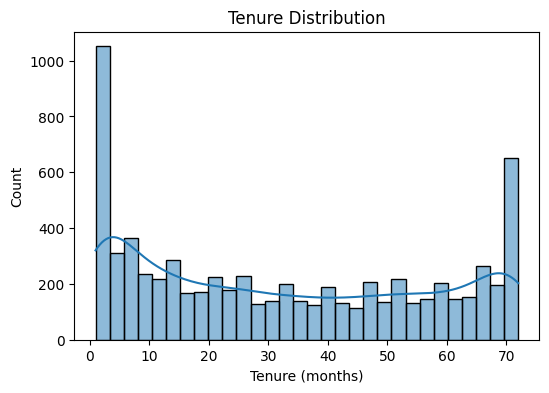

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


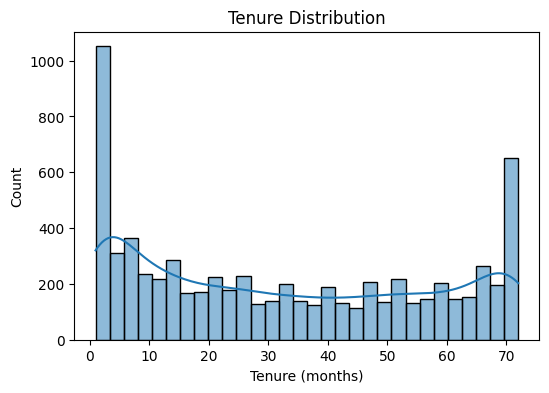

In [26]:
plt.figure(figsize=(6,4))
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title("Tenure Distribution")
plt.xlabel("Tenure (months)")
plt.ylabel("Count")
plt.show()


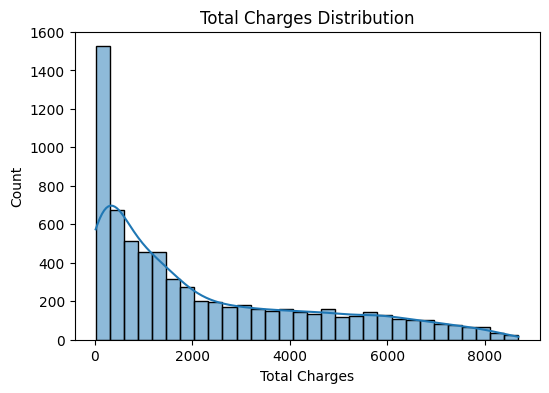

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["TotalCharges"], bins=30, kde=True)
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")
plt.ylabel("Count")
plt.show()
# total charges is left skewed since long term customers accumulate higher charges

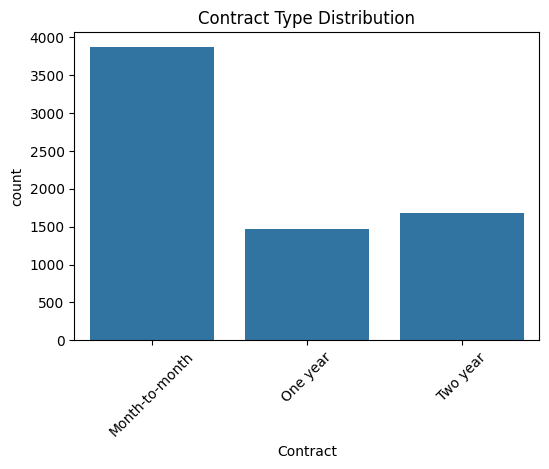

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract", data=df)
plt.title("Contract Type Distribution")
plt.xticks(rotation=45)
plt.show()
# Most customers are on month to month contracts.

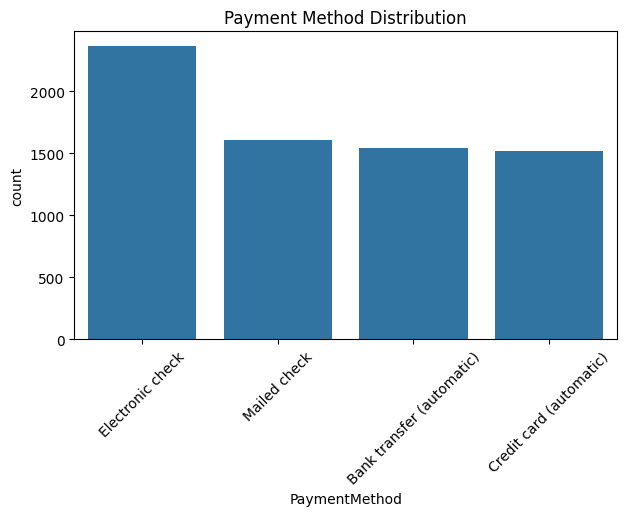

In [28]:
plt.figure(figsize=(7,4))
sns.countplot(x="PaymentMethod", data=df)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()


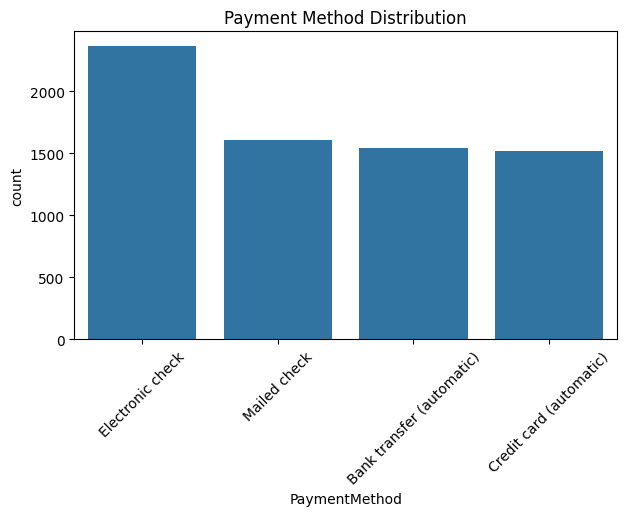

In [ ]:
plt.figure(figsize=(7,4))
sns.countplot(x="PaymentMethod", data=df)
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.show()
# Electronic check is the most common payment method.

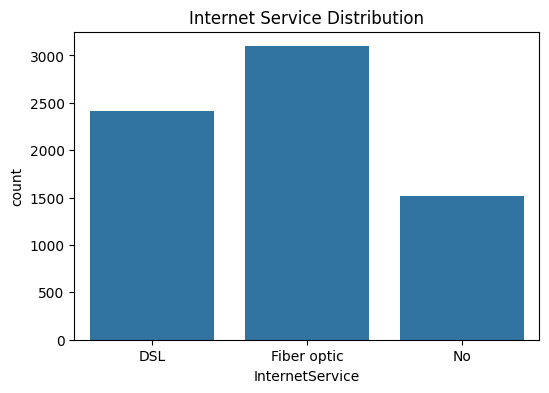

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="InternetService", data=df)
plt.title("Internet Service Distribution")
plt.show()
# most customers use Fiber optic for internet service.

In [ ]:
#  Numerical features show skewed distributions, especially tenure and total charges
# Majority of customers are on month-to-month contracts
# Payment methods and internet services show clear dominant categories
# These distributions will influence feature engineering and model behavior

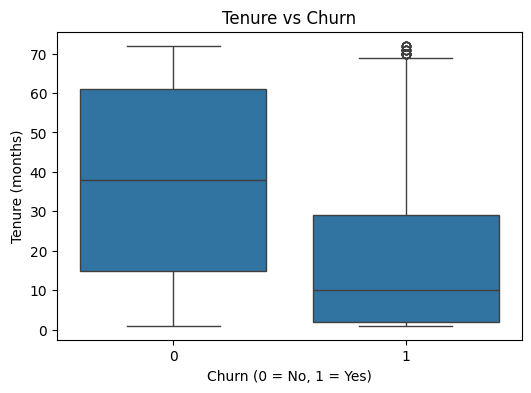

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title("Tenure vs Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (months)")
plt.show()



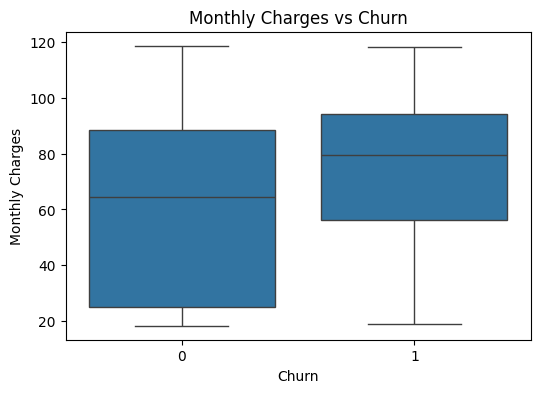

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


In [33]:
df.groupby("Contract")["Churn"].mean().sort_values(ascending=False)


Contract
Month-to-month    0.427097
One year          0.112772
Two year          0.028487
Name: Churn, dtype: float64

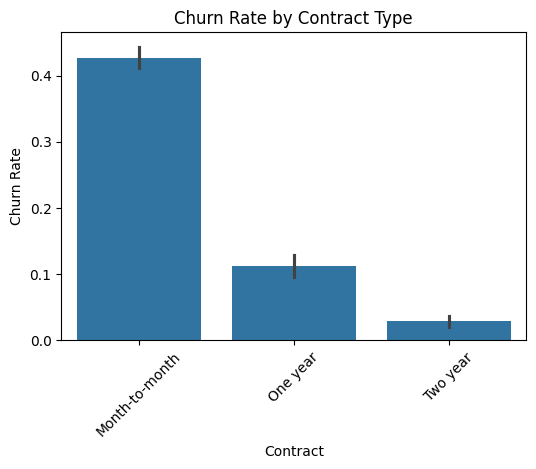

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x="Contract", y="Churn", data=df)
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


In [35]:
df.groupby("InternetService")["Churn"].mean().sort_values(ascending=False)


InternetService
Fiber optic    0.418928
DSL            0.189983
No             0.074342
Name: Churn, dtype: float64

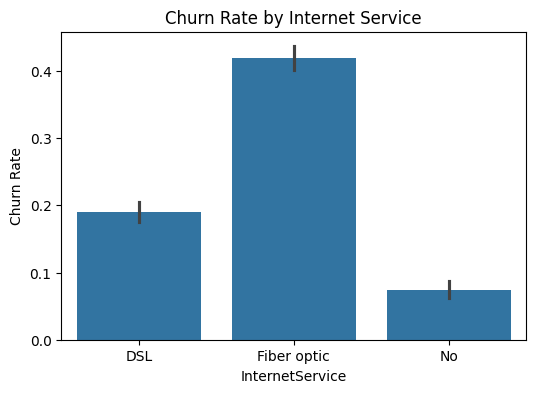

In [36]:
plt.figure(figsize=(6,4))
sns.barplot(x="InternetService", y="Churn", data=df)
plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.show()


In [37]:
df.groupby("PaymentMethod")["Churn"].mean().sort_values(ascending=False)


PaymentMethod
Electronic check             0.452854
Mailed check                 0.192020
Bank transfer (automatic)    0.167315
Credit card (automatic)      0.152531
Name: Churn, dtype: float64

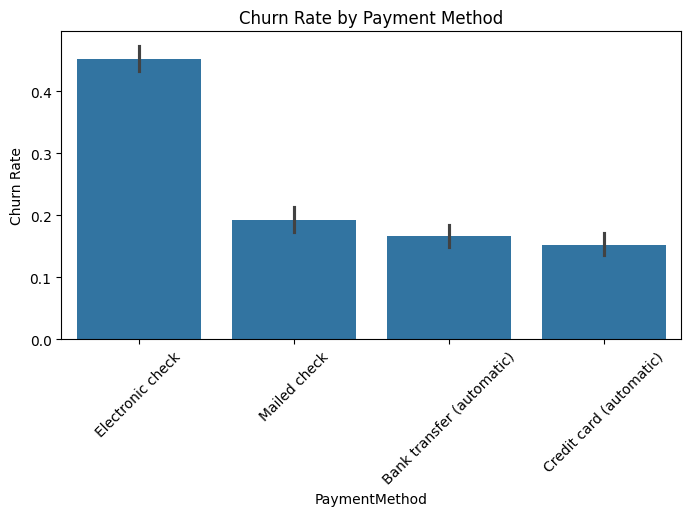

In [38]:
plt.figure(figsize=(8,4))
sns.barplot(x="PaymentMethod", y="Churn", data=df)
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()


In [ ]:
#  Key drivers of churn identified:
# Lower tenure customers churn significantly more
# Month-to-month contracts have the highest churn rates
# Higher monthly charges increase churn likelihood
# Fiber optic users show higher churn
# Electronic check payment method correlates with higher churn


In [39]:
selected_cols = [
    "tenure",
    "MonthlyCharges",
    "TotalCharges",
    "Contract",
    "PaymentMethod",
    "InternetService",
    "SeniorCitizen",
    "Partner",
    "Dependents",
    "Churn"
]

df_final = df[selected_cols]
df_final.head()


,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,InternetService,SeniorCitizen,Partner,Dependents,Churn
0,1,29.85,29.85,Month-to-month,Electronic check,DSL,0,Yes,No,0
1,34,56.95,1889.50,One year,Mailed check,DSL,0,No,No,0
2,2,53.85,108.15,Month-to-month,Mailed check,DSL,0,No,No,1
3,45,42.30,1840.75,One year,Bank transfer (automatic),DSL,0,No,No,0
4,2,70.70,151.65,Month-to-month,Electronic check,Fiber optic,0,No,No,1


In [42]:
df_final.to_csv("../data/processed/data.csv", index=False)



In [ ]:
# EDA Summary

# Key Findings:
# Customers with lower tenure are significantly more likely to churn
# Month-to-month contracts have the highest churn rates
# Higher monthly charges are associated with higher churn
# Fiber optic internet users show higher churn
# Electronic check payment method correlates with higher churn

# Actions Taken:
# Cleaned and converted numeric fields
# Removed minimal missing-value rows
# Selected relevant features for modeling
# Saved a processed dataset for downstream ML tasks
